In [4]:
import pandas as pd

df_demo= pd.read_csv("df_final_demo.txt", sep=",")
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [6]:
df_demo.shape

(70609, 9)

In [8]:
df_demo.tail(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
70589,5624770,5.0,68.0,21.0,U,3.0,41751.20,3.0,3.0
70590,2721884,15.0,190.0,53.5,F,2.0,32797.00,6.0,6.0
70591,7939133,37.0,447.0,58.5,F,2.0,375064.35,3.0,3.0
70592,4277747,12.0,155.0,40.0,M,3.0,36278.71,6.0,6.0
70593,7217125,14.0,178.0,58.5,U,2.0,319382.04,5.0,6.0
70594,7953988,10.0,120.0,32.5,M,2.0,41473.34,1.0,1.0
70595,1196936,15.0,184.0,45.5,F,2.0,482000.12,1.0,1.0
70596,6716145,9.0,119.0,31.5,M,2.0,56401.07,4.0,4.0
70597,4194308,10.0,130.0,55.5,F,2.0,57840.49,4.0,4.0
70598,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0


In [102]:
# Define a cleaning function that can optionally drop missing values and filter by age and tenure
def clean_demo_dataframe(df, 
                         drop_missing=True, 
                         min_age=None, max_age=None, 
                         min_tenure=None, max_tenure=None):
    
        # 1. Strip whitespace from string columns
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.strip()

    # 2. Convert to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass

    # 3. Standardize gender values
    if 'gendr' in df.columns:
        df['gendr'] = df['gendr'].replace({
            'U': 'Unknown',
            'X': 'Unknown',
            'M': 'Male',
            'F': 'Female'
        })

    # 4. Remove duplicate rows
    df = df.drop_duplicates()

    # 5. Drop rows with missing values if requested
    if drop_missing:
        df = df.dropna()

    # 6. Filter by age if specified
    if min_age is not None:
        df = df[df['clnt_age'] >= min_age]
    if max_age is not None:
        df = df[df['clnt_age'] <= max_age]

    # 7. Filter by client tenure if specified
    if min_tenure is not None:
        df = df[df['clnt_tenure_yr'] >= min_tenure]
    if max_tenure is not None:
        df = df[df['clnt_tenure_yr'] <= max_tenure]

    return df

In [104]:
#Loading original data
df_demo = pd.read_csv("df_final_demo.txt", sep=",")
#Cleaning function applied
df_cleaned = clean_demo_dataframe(df_demo, drop_missing=True)

In [106]:
# Check original vs cleaned shape
print("Before:", df_demo.shape)
print("After:", df_cleaned.shape)


Before: (70609, 9)
After: (70594, 9)


In [110]:
# Check gender standardization
print(df_cleaned['gendr'].value_counts())

gendr
Unknown    24125
Male       23724
Female     22745
Name: count, dtype: int64


In [112]:
# Check for duplicates and nules
print("Duplicates:", df_cleaned.duplicated().sum())
print("Nules:", df_cleaned.isna().sum())


Duplicates: 0
Nules: client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64


In [114]:
print(df_cleaned['clnt_age'].describe())
print(df_cleaned['bal'].describe())


count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: clnt_age, dtype: float64
count    7.059400e+04
mean     1.474467e+05
std      3.015106e+05
min      1.378942e+04
25%      3.734660e+04
50%      6.333459e+04
75%      1.375461e+05
max      1.632004e+07
Name: bal, dtype: float64


# Column descriptions from client profile data:

Note: time-related variables (tenure, calls, logons) reflect the status **during the experiment period**.

- `client_id`: Unique client ID
- `clnt_tenure_yr`: Client tenure in years (as of the experiment date)
- `clnt_tenure_mnth`: Client tenure in months (total time since joining Vanguard)
- `clnt_age`: Client age in years (at the time of the experiment)
- `gendr`: Gender (M = male, F = female, U = unknown or not declared)
- `num_accts`: Number of accounts the client holds
- `bal`: Total account balance for the client
- `calls_6_mnth`: Number of support calls made in the 6 months prior to the experiment
- `logons_6_mnth`: Number of times the client logged in during the 6 months prior to the experiment


<Axes: >

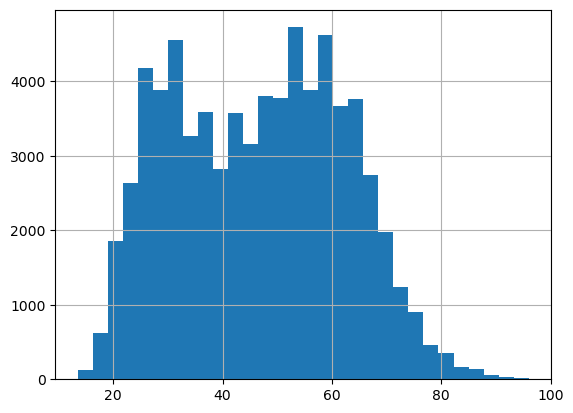

In [116]:
df_demo['clnt_age'].hist(bins=30)

#Are the primary clients younger or older?
Mediumn age and older clients.

<Axes: >

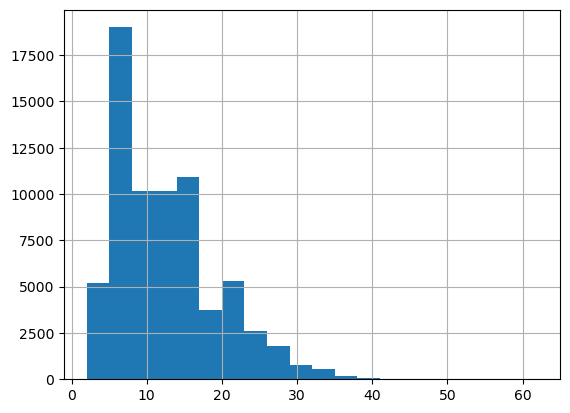

In [119]:
df_demo['clnt_tenure_yr'].hist(bins=20)

In [138]:
#Are the primary clients new or long-standing?
#The mayority of the clients are between 5 and 15 years of tenure.

<Axes: >

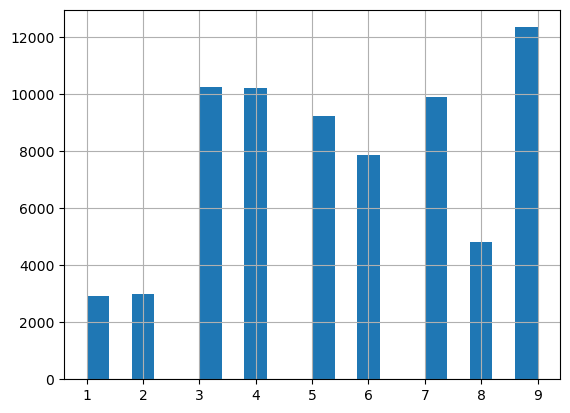

In [123]:
df_demo['logons_6_mnth'].hist(bins=20)

In [140]:
#Client login activity
#Several clients logedin more than 2 times, specially between 3 and 9 times. Max amount and mode is 9 times. 

<Axes: >

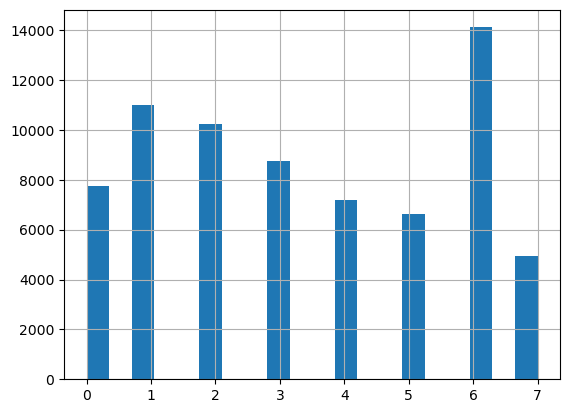

In [127]:
#Who are the primary clients the call support?
df_demo['calls_6_mnth'].hist(bins=20)


#Who is using the call support
Most clients called between 1 and 6 times in the last six months. With a peak at 6.

In [130]:
def ternure_group_asign(years):
    if years < 2:
        return '<2 yrs'
    elif years < 5:
        return '2-5 yrs'
    elif years < 10:
        return '5-10 yrs'
    elif years < 20:
        return '10-20 yrs'
    else:
        return '20 or more yrs'

df_demo['tenure_group'] = df_demo['clnt_tenure_yr'].apply(ternure_group_asign)
df_demo.groupby('tenure_group')['calls_6_mnth'].mean()

tenure_group
10-20 yrs         3.265867
2-5 yrs           3.272379
20 or more yrs    3.716820
5-10 yrs          3.381912
Name: calls_6_mnth, dtype: float64

<Axes: xlabel='tenure_group'>

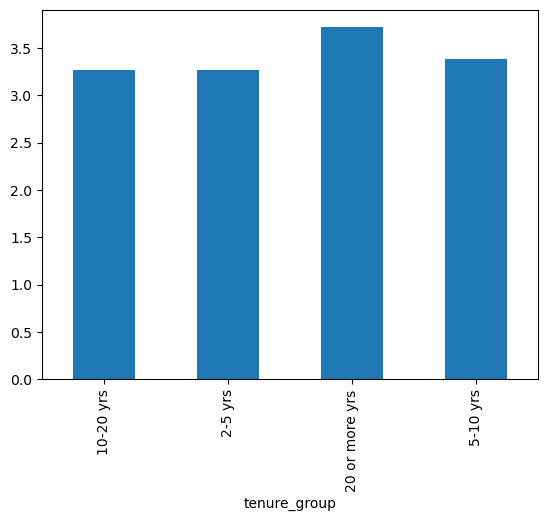

In [132]:
df_demo.groupby('tenure_group')['calls_6_mnth'].mean().plot(kind='bar')



In [142]:
#Support calls by tenure
#All groups average 3 – 4 calls.  
#Clients with 20+ years call slightly more.

In [136]:
df_demo.tail(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,tenure_group
70589,5624770,5.0,68.0,21.0,Unknown,3.0,41751.20,3.0,3.0,5-10 yrs
70590,2721884,15.0,190.0,53.5,Female,2.0,32797.00,6.0,6.0,10-20 yrs
70591,7939133,37.0,447.0,58.5,Female,2.0,375064.35,3.0,3.0,20 or more yrs
70592,4277747,12.0,155.0,40.0,Male,3.0,36278.71,6.0,6.0,10-20 yrs
70593,7217125,14.0,178.0,58.5,Unknown,2.0,319382.04,5.0,6.0,10-20 yrs
70594,7953988,10.0,120.0,32.5,Male,2.0,41473.34,1.0,1.0,10-20 yrs
70595,1196936,15.0,184.0,45.5,Female,2.0,482000.12,1.0,1.0,10-20 yrs
70596,6716145,9.0,119.0,31.5,Male,2.0,56401.07,4.0,4.0,5-10 yrs
70597,4194308,10.0,130.0,55.5,Female,2.0,57840.49,4.0,4.0,10-20 yrs
70598,7807844,5.0,70.0,37.0,Unknown,2.0,493497.05,2.0,2.0,5-10 yrs
